### Import Libraries

In [48]:
import pandas as pd 
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import dtreeviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
# from dtreeviz.trees import *
# from dtreeviz.model import dtreeviz

warnings.filterwarnings("ignore")
%matplotlib inline

<!--  -->

### Sample Data

In [66]:
tennis_data = [
    ["sunny", "hot", "high", "False", "yes"],
    ["sunny", "hot", "high", "True", "no"],
    ["sunny", "hot", "high", "False", "yes"],
    ["rainy", "mild", "high", "False", "yes"],
    ["sunny", "hot", "high", "False", "yes"],
    ["rainy", "cool", "normal", "True", "no"],
    ["sunny", "hot", "high", "False", "yes"],
    ["sunny", "mild", "high", "False", "no"],
    ["sunny", "hot", "high", "False", "yes"],
    ["rainy", "mild", "normal", "False", "yes"],
    ["sunny", "hot", "high", "False", "yes"],
    ["overcast", "mild", "high", "True", "yes"],
    ["sunny", "hot", "high", "False", "yes"],
    ["sunny", "hot", "high", "False", "yes"],
    ["overcast", "mild", "high", "True", "yes"],
]

In [67]:
# Storing into Dataframe
df_tennis_data = pd.DataFrame(tennis_data, columns=["outlook","temp","humidity","windy","play"])

<!--  -->

### Descriptive Analysis

In [68]:
print(df_tennis_data.head(2),"\n")
print("Columns: {}\n".format(df_tennis_data.columns.to_list()))
print("Data shape: {}\n".format(df_tennis_data.shape))
print(df_tennis_data.info(),"\n")
print("Missing Records per Column:")
print("--"*10)
print(df_tennis_data.isnull().sum()) # Missing values per Column
df_tennis_data.describe(include="all") # Stats

  outlook temp humidity  windy play
0   sunny  hot     high  False  yes
1   sunny  hot     high   True   no 

Columns: ['outlook', 'temp', 'humidity', 'windy', 'play']

Data shape: (15, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   15 non-null     object
 1   temp      15 non-null     object
 2   humidity  15 non-null     object
 3   windy     15 non-null     object
 4   play      15 non-null     object
dtypes: object(5)
memory usage: 732.0+ bytes
None 

Missing Records per Column:
--------------------
outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64


,outlook,temp,humidity,windy,play
count,15,15,15,15,15
unique,3,3,2,2,2
top,sunny,hot,high,False,yes
freq,10,9,13,11,12


In [69]:
df_tennis_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,yes
1,sunny,hot,high,True,no
2,sunny,hot,high,False,yes
3,rainy,mild,high,False,yes
4,sunny,hot,high,False,yes
5,rainy,cool,normal,True,no
6,sunny,hot,high,False,yes
7,sunny,mild,high,False,no
8,sunny,hot,high,False,yes
9,rainy,mild,normal,False,yes


<!--  -->

### EDA

- Play Data Distribution (Counts)

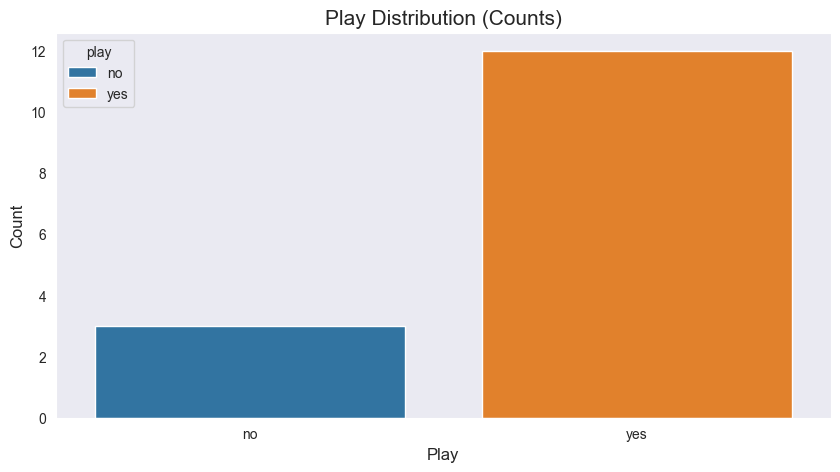

In [53]:
df_counts = df_tennis_data.groupby("play")["play"].value_counts().reset_index()

# Plot
sns.set_style("dark")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.barplot(x="play", y="count", data=df_counts, hue="play", legend=True, ax=axes)
axes.set_title("Play Distribution (Counts)", size=15)
axes.set_xlabel("Play", size=12)
axes.set_ylabel("Count", size=12)
plt.show()

- Outlook Data Distribution (Counts)

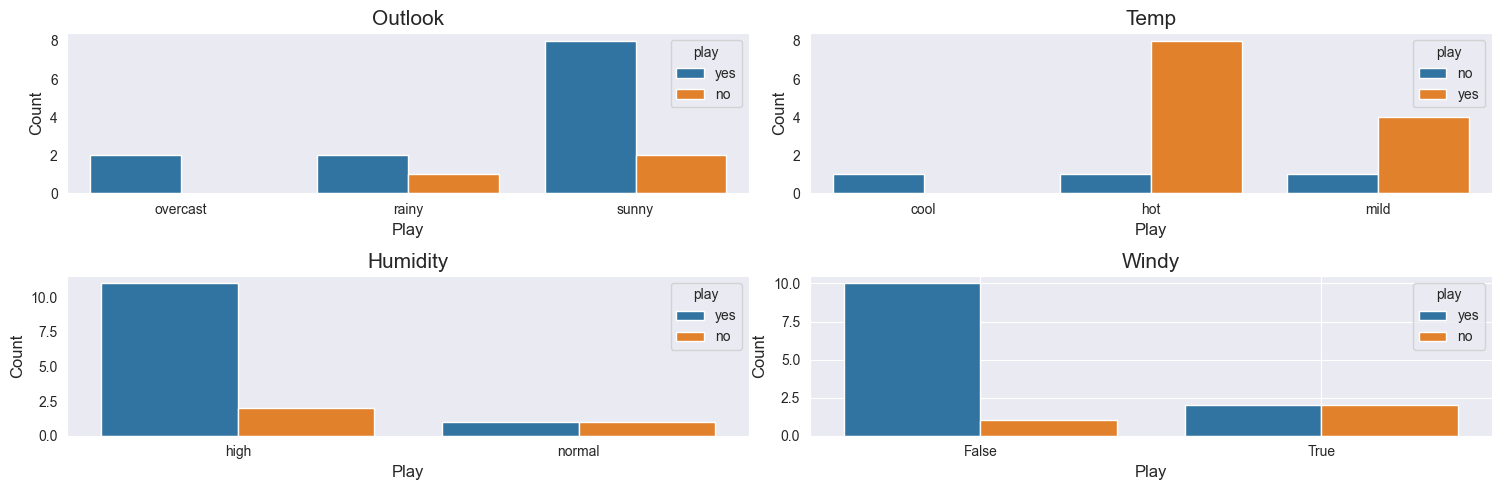

In [54]:
# Plot
sns.set_style("dark")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,5))

df_counts = df_tennis_data.groupby("outlook")["play"].value_counts().reset_index()
sns.barplot(x="outlook", y="count", data=df_counts, hue="play", legend=True, ax=axes[0][0])
axes[0][0].set_title("Outlook", size=15)
axes[0][0].set_xlabel("Play", size=12)
axes[0][0].set_ylabel("Count", size=12)

df_counts = df_tennis_data.groupby("temp")["play"].value_counts().reset_index()
sns.barplot(x="temp", y="count", data=df_counts, hue="play", legend=True, ax=axes[0][1])
axes[0][1].set_title("Temp", size=15)
axes[0][1].set_xlabel("Play", size=12)
axes[0][1].set_ylabel("Count", size=12)

df_counts = df_tennis_data.groupby("humidity")["play"].value_counts().reset_index()
sns.barplot(x="humidity", y="count", data=df_counts, hue="play", legend=True, ax=axes[1][0])
axes[1][0].set_title("Humidity", size=15)
axes[1][0].set_xlabel("Play", size=12)
axes[1][0].set_ylabel("Count", size=12)

df_counts = df_tennis_data.groupby("windy")["play"].value_counts().reset_index()
sns.barplot(x="windy", y="count", data=df_counts, hue="play", legend=True, ax=axes[1][1])
axes[1][1].set_title("Windy", size=15)
axes[1][1].set_xlabel("Play", size=12)
axes[1][1].set_ylabel("Count", size=12)

plt.grid(True)
plt.tight_layout()
plt.show()

<!--  -->

### Entropy Calculation: On Whole Target Classes

In [55]:
def calculate_entropy(df):
    print("--"*15)
    print("Entropy")
    print("--"*15)
    # Store target class counts
    class_counts = {}
    for index, row in df.iterrows():
        target_class = row["play"]
        class_counts[target_class] = class_counts.get(target_class, 0) + 1 # , 0 => handles empty/null values
    total_counts = len(df)
    print("     >> class counts --> ", class_counts)
    print("     >> total counts --> ", total_counts)

    # Calculate target class probabilities
    class_probabilities = {cls: round(count / total_counts,2) for cls, count in class_counts.items()}
    print("     >> class probabilities --> ", class_probabilities,"\n")

    # Calculate Entropy
    entropy = 0
    for p_value in class_probabilities.values(): # Iterate through each class probability value
        if p_value > 0:
            # Entropy = -Σ [p(i) * log2(p(i))]
            entropy -= p_value * math.log2(p_value)
    return round(entropy, 2)

- Total Entropy calculation on all Target classes

In [56]:
entropy_value = calculate_entropy(df_tennis_data)
print("entropy value -->", entropy_value)

# Output
# ------
# class counts -->  {'yes': 12, 'no': 3}
# total counts -->  15
# class probabilities -->  {'yes': 0.8, 'no': 0.2}
# entropy value --> 0.72

------------------------------
Entropy
------------------------------
     >> class counts -->  {'yes': 12, 'no': 3}
     >> total counts -->  15
     >> class probabilities -->  {'yes': 0.8, 'no': 0.2} 

entropy value --> 0.72


<!--  -->

### Information Gain Calculation: On One Attribute ex:- [outlook]

In [57]:
def calculate_information_gain(df, attribute):
    # Calculate initial entropy of the entire dataset
    entropy_value = calculate_entropy(df)
    print("entropy value -->", entropy_value)

    # Store information gain for each attribute
    attribute_information_gain = {}

    # Iterate through unique values of given attribute
    attribute_unique_values = set([row[attribute] for index, row in df.iterrows()])
    print("attribute unique values -->", attribute_unique_values, "\n")
    for value in attribute_unique_values:
        
        print("  *"*15)
        print("    >> attribute unique value -->", value)
        print("  *"*15)
        # Subset data based on attribute unique value
        df_subset = df[df[attribute] == value]

        # Calculate entropy for this subset data
        subset_entropy_value = calculate_entropy(df_subset)
        print("    >> subset entropy value -->", subset_entropy_value)

        # Proportion of this subset based on whole data
        subset_proportion = round(len(df_subset) / len(df), 2)
        print("    >> subset proportion -->", subset_proportion)

        # Information gain for given attribute unique value
        # Information Gain(S, A) = Entropy(S) - Σ [ |S_v| / |S| * Entropy(S_v) ]
        attribute_information_gain[value] = round((subset_proportion * subset_entropy_value),2)
    
    # Attribute final information gain of all unique values
    print("    >> attribute information gain -->", attribute_information_gain, "\n")
    total_information_gain = round(entropy_value - (sum(attribute_information_gain.values())), 2)

    return total_information_gain

In [58]:
# Calculate information gain for each attribute
column_list = [x for x in df_tennis_data.columns.tolist() if x!="play"]
print(f"Columns List : {column_list}")

Columns List : ['outlook', 'temp', 'humidity', 'windy']


In [59]:
information_gain = calculate_information_gain(df_tennis_data, "outlook")
print(f"{"outlook"} attribute information gain --> ", information_gain)

------------------------------
Entropy
------------------------------
     >> class counts -->  {'yes': 12, 'no': 3}
     >> total counts -->  15
     >> class probabilities -->  {'yes': 0.8, 'no': 0.2} 

entropy value --> 0.72
attribute unique values --> {'overcast', 'rainy', 'sunny'} 

  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
    >> attribute unique value --> overcast
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
------------------------------
Entropy
------------------------------
     >> class counts -->  {'yes': 2}
     >> total counts -->  2
     >> class probabilities -->  {'yes': 1.0} 

    >> subset entropy value --> 0.0
    >> subset proportion --> 0.13
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
    >> attribute unique value --> rainy
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
------------------------------
Entropy
------------------------------
     >> class counts -->  {'yes': 2, 'no': 1}
     >> total counts -->  3
     >> class probabilities -->  {'yes': 0.67, 

In [60]:
information_gain = calculate_information_gain(df_tennis_data, "temp")
print(f"{"temp"} attribute information gain --> ", information_gain)

------------------------------
Entropy
------------------------------
     >> class counts -->  {'yes': 12, 'no': 3}
     >> total counts -->  15
     >> class probabilities -->  {'yes': 0.8, 'no': 0.2} 

entropy value --> 0.72
attribute unique values --> {'hot', 'cool', 'mild'} 

  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
    >> attribute unique value --> hot
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
------------------------------
Entropy
------------------------------
     >> class counts -->  {'yes': 8, 'no': 1}
     >> total counts -->  9
     >> class probabilities -->  {'yes': 0.89, 'no': 0.11} 

    >> subset entropy value --> 0.5
    >> subset proportion --> 0.6
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
    >> attribute unique value --> cool
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
------------------------------
Entropy
------------------------------
     >> class counts -->  {'no': 1}
     >> total counts -->  1
     >> class probabilities -->  {'no': 1.0} 

  

In [61]:
information_gain = calculate_information_gain(df_tennis_data, "humidity")
print(f"{"humidity"} attribute information gain --> ", information_gain)

------------------------------
Entropy
------------------------------
     >> class counts -->  {'yes': 12, 'no': 3}
     >> total counts -->  15
     >> class probabilities -->  {'yes': 0.8, 'no': 0.2} 

entropy value --> 0.72
attribute unique values --> {'normal', 'high'} 

  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
    >> attribute unique value --> normal
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
------------------------------
Entropy
------------------------------
     >> class counts -->  {'no': 1, 'yes': 1}
     >> total counts -->  2
     >> class probabilities -->  {'no': 0.5, 'yes': 0.5} 

    >> subset entropy value --> 1.0
    >> subset proportion --> 0.13
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
    >> attribute unique value --> high
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
------------------------------
Entropy
------------------------------
     >> class counts -->  {'yes': 11, 'no': 2}
     >> total counts -->  13
     >> class probabilities -->  {'yes':

In [62]:
information_gain = calculate_information_gain(df_tennis_data, "windy")
print(f"{"windy"} attribute information gain --> ", information_gain)

------------------------------
Entropy
------------------------------
     >> class counts -->  {'yes': 12, 'no': 3}
     >> total counts -->  15
     >> class probabilities -->  {'yes': 0.8, 'no': 0.2} 

entropy value --> 0.72
attribute unique values --> {'False', 'True'} 

  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
    >> attribute unique value --> False
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
------------------------------
Entropy
------------------------------
     >> class counts -->  {'yes': 10, 'no': 1}
     >> total counts -->  11
     >> class probabilities -->  {'yes': 0.91, 'no': 0.09} 

    >> subset entropy value --> 0.44
    >> subset proportion --> 0.73
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
    >> attribute unique value --> True
  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *
------------------------------
Entropy
------------------------------
     >> class counts -->  {'no': 2, 'yes': 2}
     >> total counts -->  4
     >> class probabilities -->  {'no':

 <!--  -->

### Categorical to Numerical Features Creation

- Dummy Variables Creation

In [63]:
# Create dummy vars
df_dummy = pd.get_dummies(data=df_tennis_data, columns=column_list)
df_dummy

,play,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal,windy_False,windy_True
0,yes,False,False,True,False,True,False,True,False,True,False
1,no,False,False,True,False,True,False,True,False,False,True
2,yes,False,False,True,False,True,False,True,False,True,False
3,yes,False,True,False,False,False,True,True,False,True,False
4,yes,False,False,True,False,True,False,True,False,True,False
5,no,False,True,False,True,False,False,False,True,False,True
6,yes,False,False,True,False,True,False,True,False,True,False
7,no,False,False,True,False,False,True,True,False,True,False
8,yes,False,False,True,False,True,False,True,False,True,False
9,yes,False,True,False,False,False,True,False,True,True,False


In [70]:
# Convert categorical vars into numerical
encoder = LabelEncoder()
df_label_encoder = df_tennis_data.copy(deep=True)

df_label_encoder["outlook"] = encoder.fit_transform(df_label_encoder["outlook"])
df_label_encoder["humidity"] = encoder.fit_transform(df_label_encoder["humidity"])
df_label_encoder["temp"] = encoder.fit_transform(df_label_encoder["temp"])
df_label_encoder["windy"] = encoder.fit_transform(df_label_encoder["windy"])

df_label_encoder

,outlook,temp,humidity,windy,play
0,2,1,0,0,yes
1,2,1,0,1,no
2,2,1,0,0,yes
3,1,2,0,0,yes
4,2,1,0,0,yes
5,1,0,1,1,no
6,2,1,0,0,yes
7,2,2,0,0,no
8,2,1,0,0,yes
9,1,2,1,0,yes


Observation 

- With this method our predictors i.e., ``outlook, temp, humidity, windy`` -> becomes new features like ``outlook_overcast, outlook_rainy, outlook_sunny, temp_cool, temp_hot, temp_mild, humidity_high, humidity_normal, windy_False, windy_True``. 
- As these becomes new predictor columns which is okay with other model, but as I wanted to compare my above Entropy and Information to Sklearn model decision tree split. So I want to keep predictors ``outlook, temp, humidity, windy`` as it is, just will encode label to numerical value.

<!--  -->

### Model Training

- With Dummy Vars

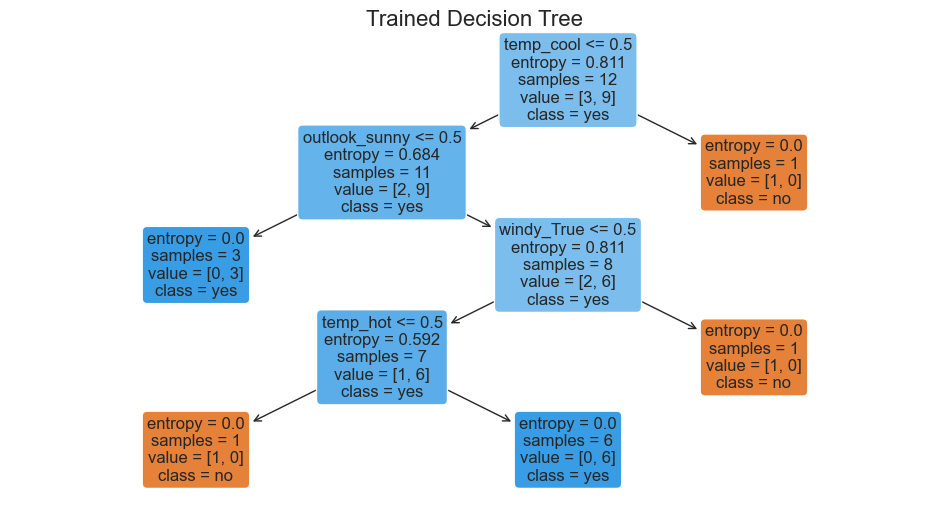

In [65]:
X = df_dummy.drop('play', axis=1)
y = df_dummy["play"]

# Train and Test split
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# Train Model
dtree = DecisionTreeClassifier(criterion="entropy", random_state=0)
# dtree = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=0)
dtree.fit(X_train, y_train)

# Trained Decision Tree Visual
fig = plt.figure(figsize=(12, 6))
sns.set_style('dark')
plot_tree(dtree, 
            feature_names=X_train.columns.tolist(), 
            fontsize=12, 
            filled=True, 
            rounded=True,
            class_names=['no', 'yes'] # This order displays "no" on the right side of the tree and "yes" on the left side. 
            )
plt.title("Trained Decision Tree", size=16)
plt.show()

- With Label Encoded Vars

In [72]:
df_label_encoder

,outlook,temp,humidity,windy,play
0,2,1,0,0,yes
1,2,1,0,1,no
2,2,1,0,0,yes
3,1,2,0,0,yes
4,2,1,0,0,yes
5,1,0,1,1,no
6,2,1,0,0,yes
7,2,2,0,0,no
8,2,1,0,0,yes
9,1,2,1,0,yes


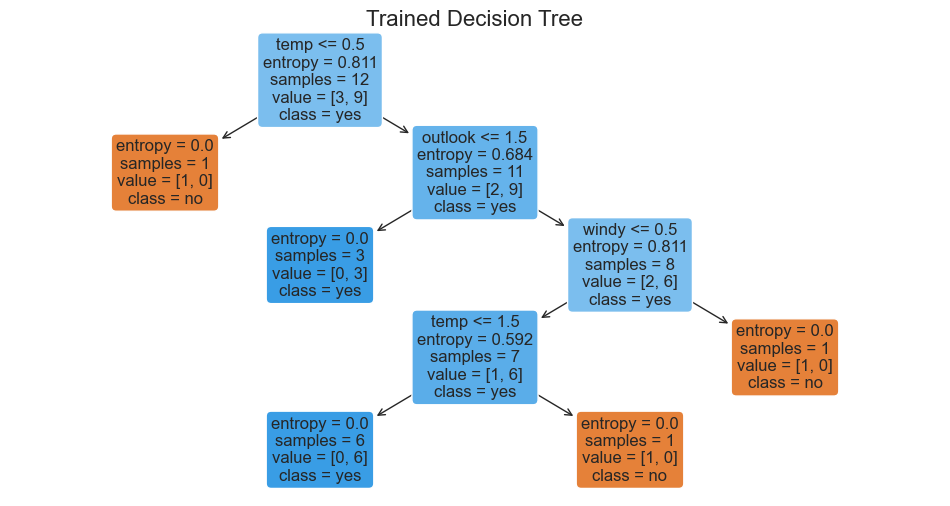

In [74]:
X = df_label_encoder.drop('play', axis=1)
y = df_label_encoder["play"]

# Train and Test split
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# Train Model
dtree = DecisionTreeClassifier(criterion="entropy", random_state=0)
# dtree = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=0)
dtree.fit(X_train, y_train)

# Trained Decision Tree Visual
fig = plt.figure(figsize=(12, 6))
sns.set_style('dark')
plot_tree(dtree, 
            feature_names=X_train.columns.tolist(), 
            fontsize=12, 
            filled=True, 
            rounded=True,
            class_names=['no', 'yes'] # This order displays "no" on the right side of the tree and "yes" on the left side. 
            )
plt.title("Trained Decision Tree", size=16)
plt.show()

In [13]:
df_tennis_data.loc[X_train.index.tolist(),:][df_tennis_data["temp"]=="cool"]

,outlook,temp,humidity,windy,play
5,rainy,cool,normal,True,no


In [14]:
df_tennis_data.loc[X_train.index.tolist(),:][df_tennis_data["temp"]!="cool"]["play"].count()
df_tennis_data.loc[X_train.index.tolist(),:][df_tennis_data["temp"]!="cool"]["play"]

12    yes
10    yes
0     yes
14    yes
4     yes
8     yes
9     yes
7      no
6     yes
1      no
11    yes
Name: play, dtype: object

In [15]:
df_tennis_data.loc[X_train.index.tolist(),:][df_tennis_data["temp"]!="cool"]["play"].count()
df_tennis_data.loc[X_train.index.tolist(),:][(df_tennis_data["temp"]!="cool") & (df_tennis_data["outlook"]!="sunny")]["play"]

14    yes
9     yes
11    yes
Name: play, dtype: object

In [ ]:
# fig = plt.figure(figsize=(12, 6))
# sns.set_style('dark')

# plot_tree(dtree)

# plt.title("Trained Decision Tree", size=16)
# plt.show()

In [22]:
# # View tree with feature names
# viz = dtreeviz.model(dtree, 
#                 feature_names=X_train.columns,
#                 X_train=X_train, 
#                 y_train=y_train
#                 )
# viz.view(scale=1.2)

In [ ]:
print("X_train sample counts : {}".format(len(X_train)))
print("y_test sample counts : {}\n".format(len(X_text)))

y_pred = dtree.predict(X_text)
accuracy = metrics.accuracy_score(y_test, y_pred)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
print('Accuracy: {:.2f}'.format(accuracy))

In [1]:
# Define the data as lists
outlook = ["sunny", "sunny", "overcast", "Rain", "Rain", "Rain", "overcast", "sunny", "sunny", "rainy", "sunny", "overcast", "overcast", "rainy"]
temp = ["hot", "hot", "hot", "mild", "cool", "cool", "cool", "mild", "cool", "mild", "mild", "mild", "hot", "mild"]
humidity = ["high", "high", "high", "high", "normal", "normal", "normal", "high", "normal", "normal", "normal", "high", "normal", "high"]
windy = ["false", "true", "false", "false", "false", "true", "true", "false", "false", "false", "true", "true", "false", "true"]
play = ["no", "no", "yes", "yes", "yes", "no", "yes", "no", "yes", "yes", "yes", "yes", "yes", "no"]

# Function to calculate entropy (assuming binary classification)
def calculate_entropy(data):
  from math import log2
  class_counts = {c: data.count(c) for c in set(data)}
  p = [v / len(data) for v in class_counts.values()]
  entropy = -sum(p * log2(p) for p in p if p > 0)
  return entropy

# Calculate entropy for the entire dataset (play)
total_entropy = calculate_entropy(play)
print("Entropy of entire dataset (play):", total_entropy)

# Calculate information gain for each feature (outlook, temp, humidity, windy)
features = [outlook, temp, humidity, windy]
for feature_name, feature_data in zip(features, features):
  # Calculate entropy for each unique value in the feature
  unique_values = set(feature_data)
  entropy_after_split = 0
  for value in unique_values:
    # Filter data points with this specific value
    filtered_data = [data for data, f in zip(play, feature_data) if f == value]
    # Calculate entropy for the filtered data (play)
    entropy_of_value = calculate_entropy(filtered_data)
    # Weight the entropy by the proportion of data points with this value
    proportion = len(filtered_data) / len(play)
    entropy_after_split += proportion * entropy_of_value
  
  # Information gain = total entropy - entropy after split
  information_gain = total_entropy - entropy_after_split
  print("Information Gain for", feature_name, ":", information_gain)


Entropy of entire dataset (play): 0.9402859586706311
Information Gain for ['sunny', 'sunny', 'overcast', 'Rain', 'Rain', 'Rain', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'] : 0.25388306763943036
Information Gain for ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'] : 0.02922256565895487
Information Gain for ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'] : 0.15183550136234159
Information Gain for ['false', 'true', 'false', 'false', 'false', 'true', 'true', 'false', 'false', 'false', 'true', 'true', 'false', 'true'] : 0.04812703040826949
